In [28]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2
from skimage.io import imread_collection
from matplotlib import pyplot as plt

# Grayscale plot of single image

In [72]:
path = '/Users/arpit/Desktop/GAN/Generated_Paintings/1.png'
# read the image as grayscale from the outset
image = skimage.io.imread(fname=path, as_gray=True)
# display the image
viewer_gray = skimage.viewer.ImageViewer(image)
#viewer_gray.show()

In [73]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

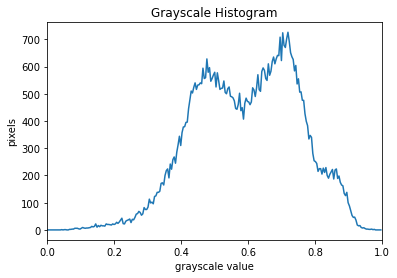

In [74]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

# RGB Plot fo single image

In [75]:
# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=path)

# display the image
viewer_color = skimage.viewer.ImageViewer(image)
viewer_color.show()

[]

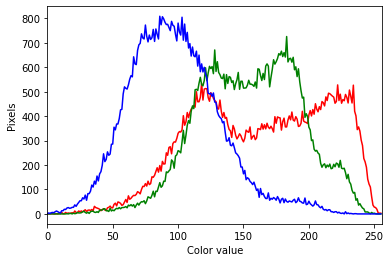

In [76]:
# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

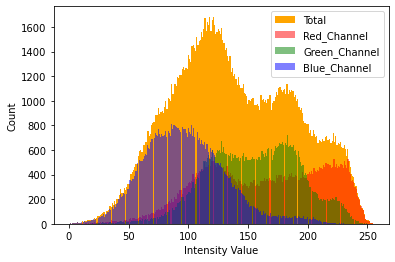

In [77]:
#RGB WITH TOTAL PLOT
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

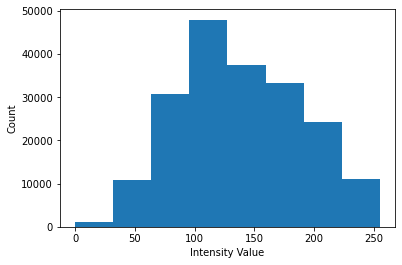

In [78]:
# Histogram plot
_ = plt.hist(image.ravel(), bins = 8 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.show()

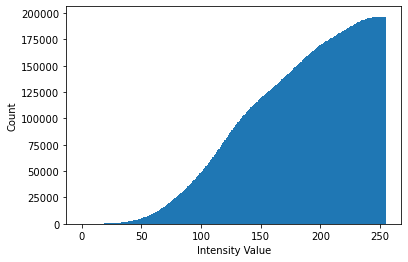

In [79]:
# Cumulative Histogram
_ = plt.hist(image.ravel(), bins = 256, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
plt.show()

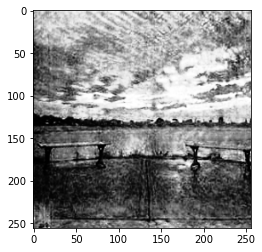

array([[235, 211, 198, ..., 211, 187, 150],
       [241, 218, 176, ..., 196, 176, 168],
       [213, 166, 155, ..., 158, 160, 141],
       ...,
       [ 70,  86, 111, ..., 102,  91,  91],
       [ 61,  77,  91, ...,  98,  84,  84],
       [ 54,  84,  86, ..., 104, 109, 107]], dtype=uint8)

In [80]:
show_grayscale_equalized(image)

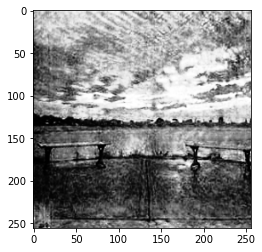

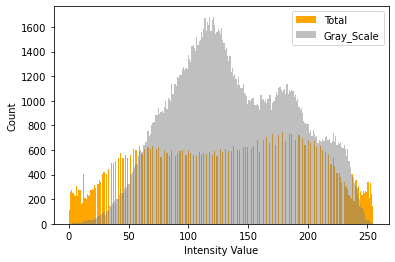

In [86]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_grayscale_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image.ravel(), bins = 256, color = 'gray', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Gray_Scale'])
plt.show()

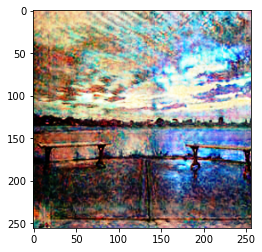

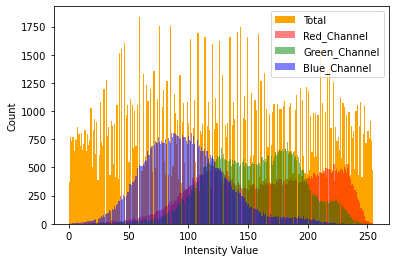

In [84]:
#RGB WITH TOTAL PLOT
_ = plt.hist(show_rgb_equalized(image).ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

# 17.02.2021 (Continue)

[[182.2383651  179.35522926 124.99158509]
 [ 76.3204962   87.10794297  46.97148676]
 [148.41165276 147.01427317  93.78341385]
 [222.07986406 214.03653356 156.86094591]
 [219.34035279 177.09441293  91.76066516]
 [114.59291085 120.4981203   74.20173201]]


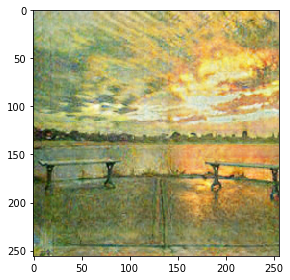

In [20]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

original = io.imread('/Users/arpit/Desktop/GAN/Generated_Paintings/1.png')
n_colors = 6

arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)
less_colors = centers[labels].reshape(original.shape).astype('uint8')


io.imshow(original)


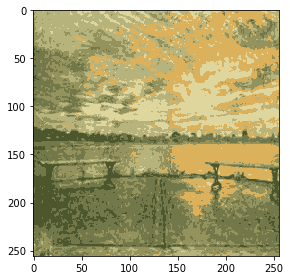

In [21]:
io.imshow(less_colors)

In [63]:
def rgb_plot(image):
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.show()

In [141]:
def color_quantization(original):
    #original = io.imread(path)
    n_colors = 256
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors

In [142]:
col = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [143]:
len(col)

751

In [ ]:
temp = []
for i in col:
     temp.append(color_quantization(i))

In [ ]:
len(temp)

In [ ]:
temp[0]

In [ ]:
io.imshow(temp[0])

In [ ]:
io.imshow(col[0])

In [ ]:
rgb_plot(temp[2])

In [ ]:
labels

In [ ]:
temp[0]

In [ ]:
centers

In [ ]:
(set(temp[0].flatten()))

In [ ]:
img = temp[0]

In [ ]:
img = img.reshape(-1, img.shape[2])

In [ ]:
print (img.shape)

In [ ]:
counter = np.unique(img, axis=0)
# n unique colors (3 values per pixel)
print (counter.shape)

In [ ]:
counter

In [ ]:
un = []
for img in temp:
    img = img.reshape(-1, img.shape[2])
    counter = np.unique(img, axis=0)
    un.append(counter)

In [ ]:
unique_colors = np.unique(un, axis=0)

In [ ]:
unique_colors

In [ ]:
flat_list = [item for sublist in unique_colors for item in sublist]

In [ ]:
len(flat_list)

In [ ]:
flat_list[1]

In [ ]:
unique_list = np.unique(flat_list,axis=0)

In [ ]:
len(unique_list)

In [ ]:
unique_list 